# Machine Learning Model Building Pipeline: Model Building


## Predicting Rent Price of Houses

This is the notebook for step 3: Model Building

Final Notebook for the Machine Learning Pipeline. We will try out 4 different models:

1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. XgBoost Regressor

and for each of the four models we will check the MAE, RMSE, along with R2_Score. And choose the model that give us best evalution metrics

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore annoying warning (from sklearn and seaborn)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

In [2]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,4.0,7.021976,3.0,7.185387,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0
1,4.0,6.716595,3.0,7.033506,1.0,1.5,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,7.0
2,4.0,6.685861,3.0,6.833032,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,7.0
3,4.0,6.666957,3.0,6.954639,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,7.0
4,4.0,6.803505,3.0,7.169350,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,7.0


***Data Split 1: all of our final dataset, no scaling***

In [3]:
y = data['price']
X = data.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

***Data Split 2: all of our final dataset, with scaling***

In [4]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

## Linear Regression

From our EDA, we can see that most features do not have a linear relationship with our labels, yet we will try linear regression, and use the result as a reference.

***Model Training***

In [5]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

LinearRegression()

***Predictions***

In [6]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)

***Evaluation***

Linear Regression Performance:

all features, No scaling:
MAE: 0.2140580280597557
RMSE: 0.39341662349964124
R2_Score:  0.29694488489590876

all features, with scaling:
MAE: 0.21399852352967483
RMSE: 0.39341860487814606
R2_Score:  0.2969378032337857


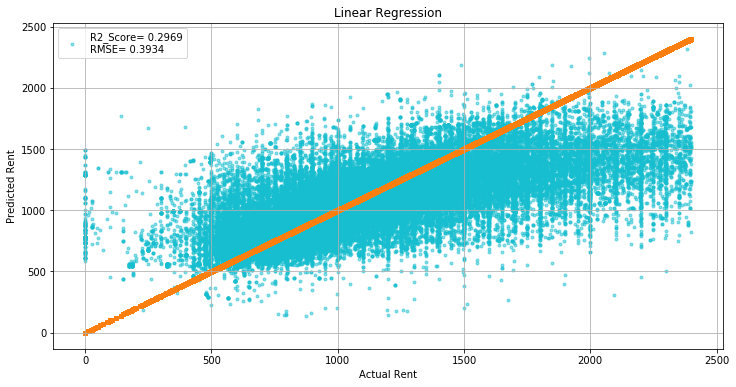

In [11]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.expm1(lm2_pred), 'Actual_Rent': np.expm1(y2_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y2_test, lm2_pred), 
                np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
           ],
           loc='best')
plt.title('Linear Regression')
plt.grid()
plt.show()

The orange line in the graph represents the actual rents. And the cyan circles plotted against actual rents on the x-axis and predicted rent on the y-axis, are the predicted rents.

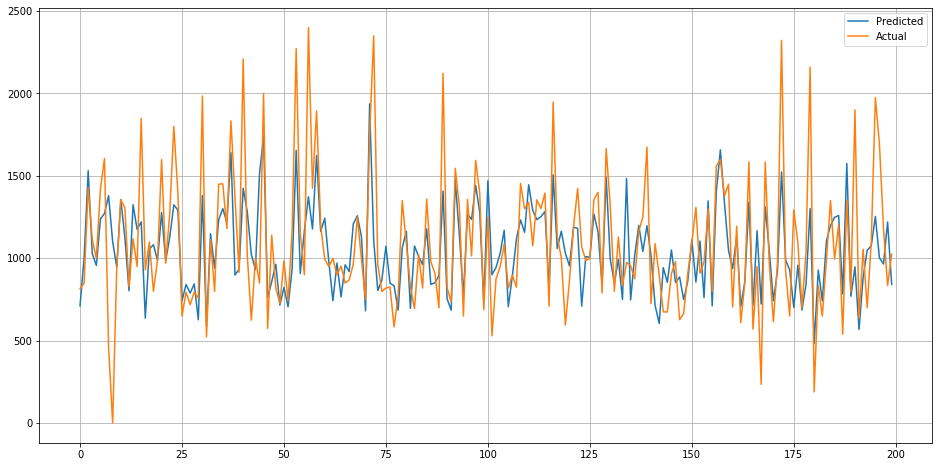

In [12]:
test = pd.DataFrame({'Predicted':np.expm1(lm1_pred),'Actual':np.expm1(y_test)})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:200])
plt.legend(['Predicted','Actual'])
plt.grid()

Linear Model worked terribly, which was expected as there were no linear relationship among the features. Feature scaling has a small positive effect on LR's prediction performance.

## Random Forest

Let's first try random forest with our data splits (with and without feature selection). Scaling the features should not affect this algorithm's performance, still we are going to test it. later we will try to improve its performance.

***Model Training***

In [13]:
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf2 = RandomForestRegressor(random_state=101, n_estimators=200)

rf1.fit(X_train, y_train)
rf2.fit(X2_train, y2_train)

RandomForestRegressor(n_estimators=200, random_state=101)

***Predictions***

In [14]:
rf1_pred = rf1.predict(X_test)
rf2_pred = rf2.predict(X2_test)

***Evaluation***

Random Forest Performance:

all features, No scaling:
MAE: 0.08726433858169966
RMSE: 0.20920134845282037
R2_Score:  0.8012015847940244

all features, with scaling:
MAE: 0.12877280329861393
RMSE: 0.28543349123509754
R2_Score:  0.6299215316926785


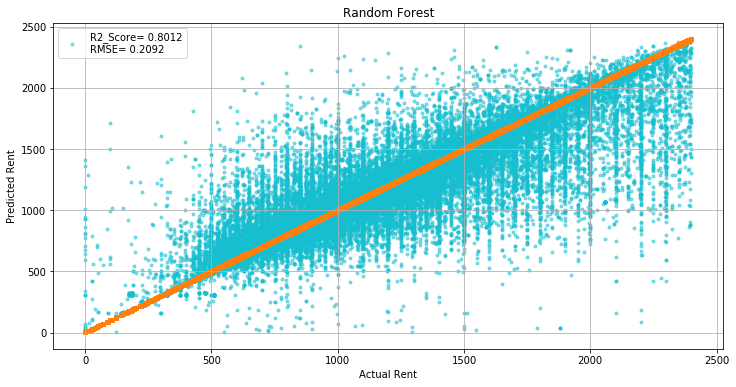

In [15]:
print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, rf2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rf2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, rf2_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.expm1(rf1_pred), 'Actual_Rent': np.expm1(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, rf1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
           ],
           loc='best')
plt.title('Random Forest')
plt.grid()
plt.show()

Features without scaling gave a better result on random forest than with scaled features

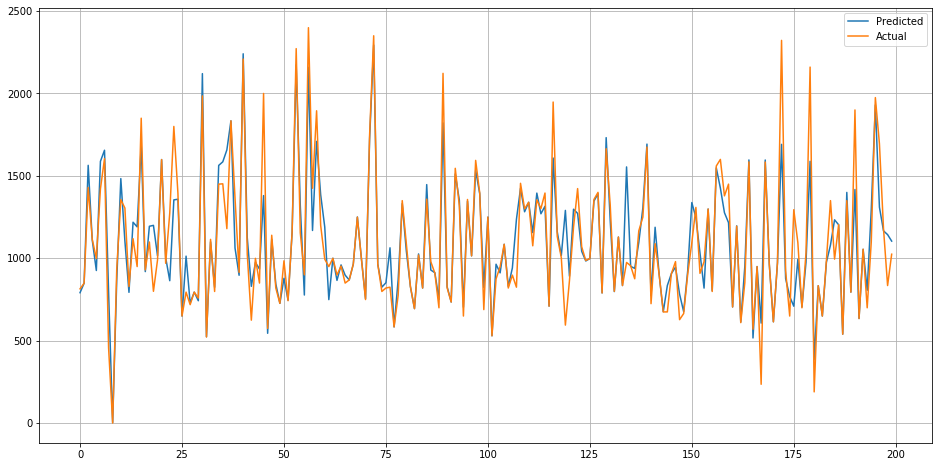

In [16]:
test = pd.DataFrame({'Predicted':np.expm1(rf1_pred),'Actual':np.expm1(y_test)})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:200])
plt.legend(['Predicted','Actual'])
plt.grid()


***Optimization***

We will use grid search in order to obtain good parameters for our RF regressor. Of course our optimization here will be limited due to time and computing power constraints. The parameters we will optimise are:

- n-estimators
- min_samples_leaf
- max_features
- bootstrap



In [17]:
rf_param_grid = {'max_features': ['sqrt', 'auto'],
                 'min_samples_split': [4, 6],
              'min_samples_leaf': [3, 5],
              'n_estimators': [100, 200],
             'bootstrap': [False, True]}

In [18]:
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)

In [19]:
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 200]})

In [20]:
rf_grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

In [21]:
rf_grid.best_estimator_

RandomForestRegressor(min_samples_leaf=3, min_samples_split=4, n_estimators=200)

In [22]:
rf_grid_predictions = rf_grid.predict(X_test)

MAE: 0.09874940903584023
RMSE: 0.2173076095490536
R2_Score:  0.7854967741684185


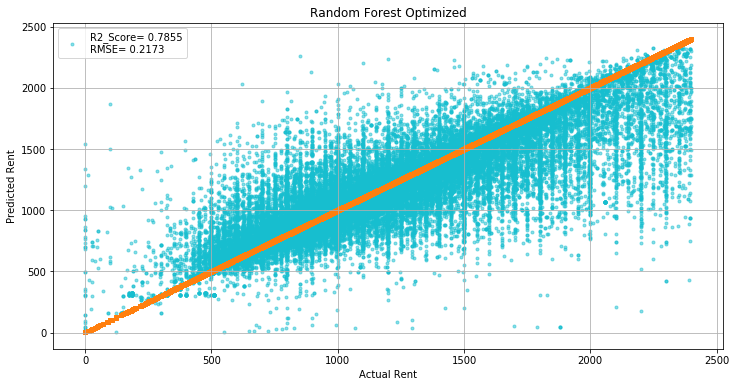

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))

pred = pd.DataFrame(data={'Predicted_Rent': np.expm1(rf_grid_predictions), 'Actual_Rent': np.expm1(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, rf_grid_predictions), 
                np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
           ],
           loc='best')
plt.title('Random Forest Optimized')
plt.grid()
plt.show()

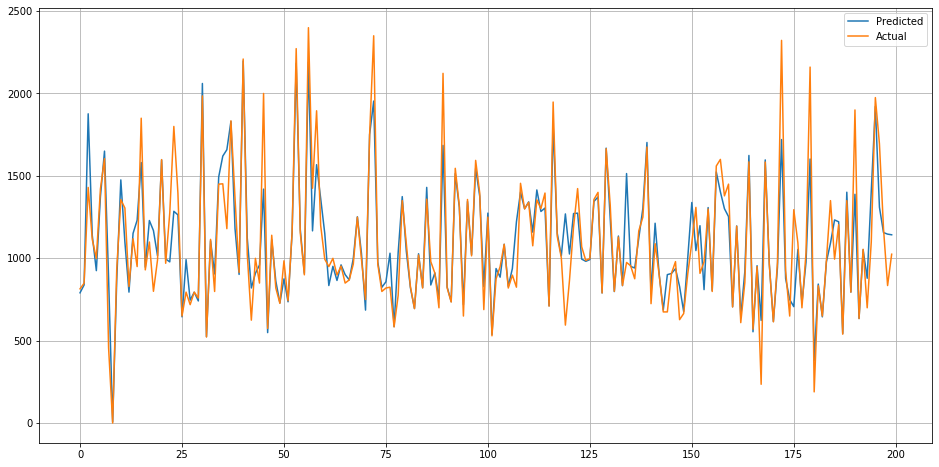

In [24]:
test = pd.DataFrame({'Predicted':np.expm1(rf_grid_predictions),'Actual':np.expm1(y_test)})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:200])
plt.legend(['Predicted','Actual'])
plt.grid()

We can see that the optimization process on RF regressor has not changed the performance in a noticebale manner, yet the slight change was actually to the worst, that is probably because our initial parameters were already very close to the optimum ones.

## Gradient Boosting

***Training***

In [25]:
gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, 
                                 min_samples_leaf=1, max_depth=3, subsample=1.0, max_features= None, 
                                 random_state=101)

gbm1.fit(X_train, y_train)

GradientBoostingRegressor(random_state=101)

***Predictions***

In [26]:
gbm1_pred = gbm1.predict(X_test)

***Evaluation***

Gradiant Boosting Performance:

all features, No scaling:
MAE: 0.19367940254375207
RMSE: 0.3619760535135779
R2_Score:  0.40482642554457704


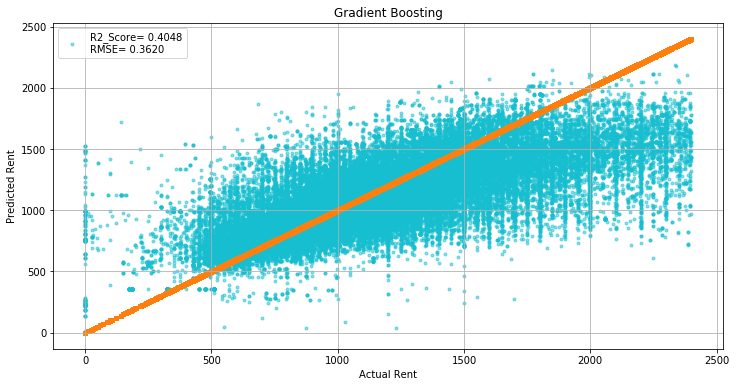

In [27]:
print('Gradiant Boosting Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, gbm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, gbm1_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.expm1((gbm1_pred)), 'Actual_Rent': np.expm1((y_test))})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, gbm1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)))
           ],
           loc='best')
plt.title('Gradient Boosting')
plt.grid()
plt.show()

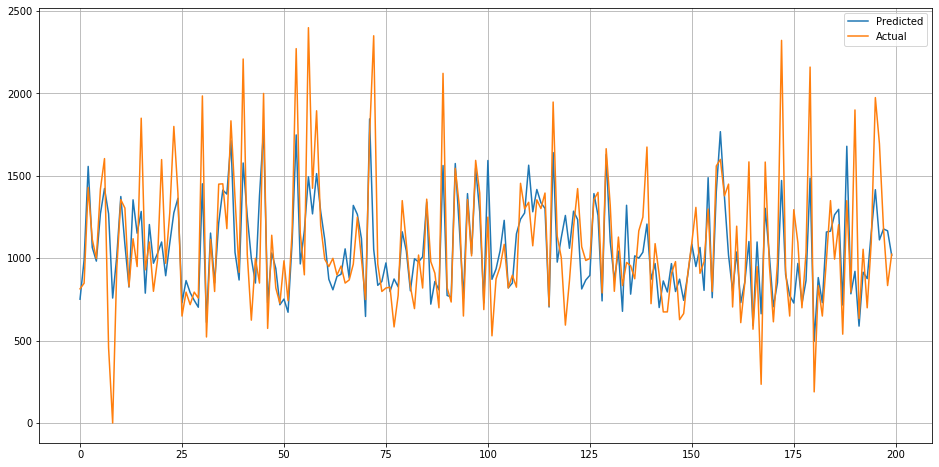

In [28]:
test = pd.DataFrame({'Predicted':np.expm1(gbm1_pred),'Actual':np.expm1(y_test)})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:200])
plt.legend(['Predicted','Actual'])
plt.grid()

It is clear that Gradiant Boosting gave us a very poor performance, compared to Random Forest. So not opting for an optimization.

## XgBoost

***Model Training***

We will train the xgboost regressor with the default parameter values

In [29]:
xgb1 = XGBRegressor(learning_rate=0.1, n_estimators=100, 
                    min_samples_split=2, min_samples_leaf=1, 
                    max_depth=3, subsample=1.0, random_state=101)

xgb1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, min_samples_leaf=1, min_samples_split=2,
             missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=1, random_state=101, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1.0, tree_method=None,
             validate_parameters=False, verbosity=None)

***Predictions***

In [30]:
xgb1_pred = xgb1.predict(X_test)

***Evaluation***

XgBoost Performance:

all features, No scaling:
MAE: 0.19371026079414172
RMSE: 0.3630204853503332
R2_Score:  0.4013868884800329


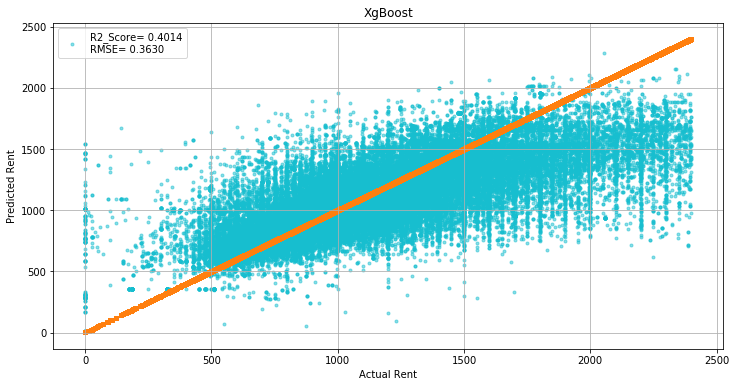

In [31]:
print('XgBoost Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, xgb1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, xgb1_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.expm1(xgb1_pred), 'Actual_Rent': np.expm1(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, xgb1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, xgb1_pred)))
           ],
           loc='best')
plt.title('XgBoost')
plt.grid()
plt.show()

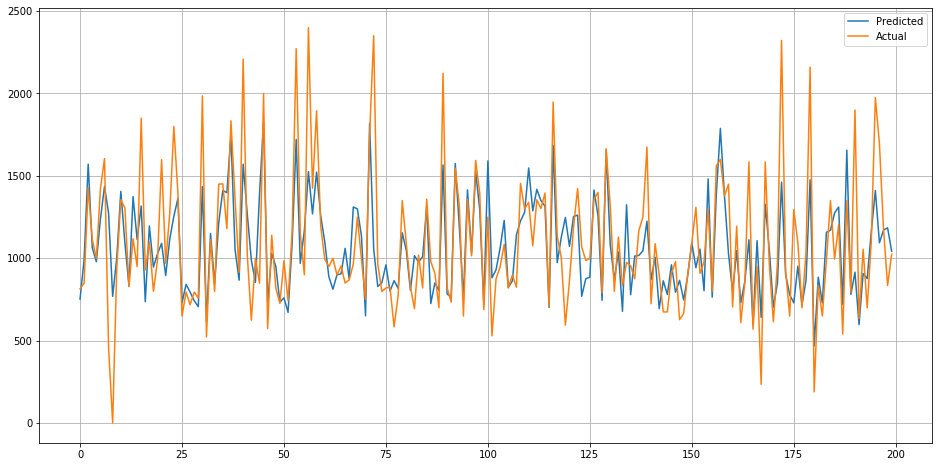

In [32]:
test = pd.DataFrame({'Predicted':np.expm1(xgb1_pred),'Actual':np.expm1(y_test)})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:200])
plt.legend(['Predicted','Actual'])
plt.grid()

XgBoost also performed poorly. So will not be optimizing it.

## Conclusion

In this project, we used house rent dataset to build a monthly rent predictor. 4 different learning regressors (Linear Regression, Random Forest, Gradiant Boosting, and XgBoost) were tested, and we have acheived the best prediction performance using Random Forest, followed by Gradiant Boosting, and then XgBoost, while Linear Regression, acheived the worst performance of the 4.

The best prediction performance was acheived using Random Forest regressor, using all features in the dataset, and resulted in the following metrics:

- Mean Absolute Error (MAE): 0.0591
- Root mean squared error (RMSE): 0.1717
- R-squared Score (R2_Score): 0.8746